# Data Loading

Mengimport kaggle.json sebagai authorization untuk mendownload dataset menggunakan kaggle command line

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          10033        297  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            964         37  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2572         73  1.0              
evan

Download dataset menggunakan perintah ```!kaggle datasets download user_dataset/dataset -p /direktori_tujuan --unzip ```

link dataset : [kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality)

In [ ]:
!kaggle datasets download rajyellow46/wine-quality -p /content/sample_data --unzip

  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 65.5MB/s]


import segala library yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

load dataset menggunakan pandas

In [ ]:
DATASET_PATH = "/content/sample_data/winequalityN.csv"
wine = pd.read_csv(DATASET_PATH)
display(wine)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

Output kode di atas memberikan informasi sebagai berikut:

* Ada 6497 baris dataset.
* Terdapat 13 kolom : type, fixed acidity, volatile acidity,	citric acid,	residual sugar,	chlorides,	free sulfur dioxide,	total sulfur dioxide,	density
pH,	sulphates,	alcohol,	quality

# Exploratory Data Analysis

## Deskripsi Variabel

In [ ]:
#Menampilkan Informasi
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Dari output terlihat bahwa:

* Terdapat 12 kolom dengan tipe numerik, yaitu: fixed acidity, volatile acidity,	citric acid,	residual sugar,	chlorides,	free sulfur dioxide,	total sulfur dioxide,	density, pH,	sulphates,	alcohol,	quality.

* Terdapat 1 buah kolum dengan tipe object : type



---
* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom. 
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval * dalam empat bagian sebaran yang sama. 
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.


In [ ]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

## Menangani Missing Value

Mengecek jumlah data yang memiliki nilai null

In [ ]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Dari output diatas beberapa kolum memiliki nilai null, data yang memiliki nilai null sebaiknya di hapus karena merupakan data yang tidak valid dan dapat mengganggu saat proses training karna hanya menerima bilangan numerik.

In [ ]:
wine = wine.dropna()
wine.shape

(6463, 13)

Mengecek setelah penghapusan data yang memiliki null / missing value

In [ ]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Menangani Outliers

Didalam dataset terkadang terdapat data yang berada di luar lingkungan pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil pengamatan lainnya. 

Melihat outlier pada tiap data numerik.

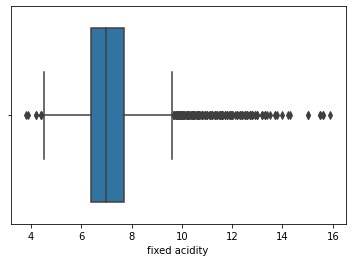

In [ ]:
sns.boxplot(x=wine['fixed acidity'])

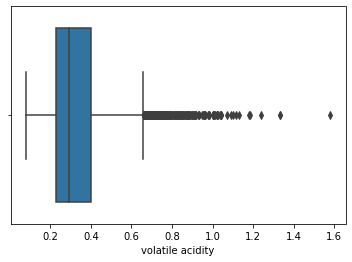

In [ ]:
sns.boxplot(x=wine['volatile acidity'])

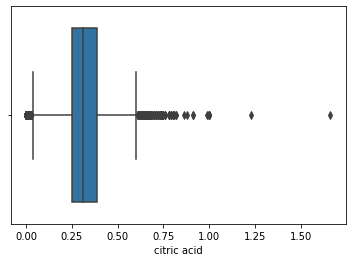

In [ ]:
sns.boxplot(x=wine['citric acid'])

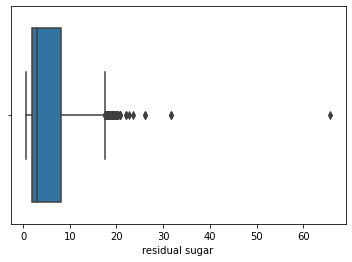

In [ ]:
sns.boxplot(x=wine['residual sugar'])

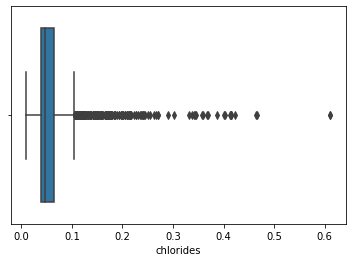

In [ ]:
sns.boxplot(x=wine['chlorides'])

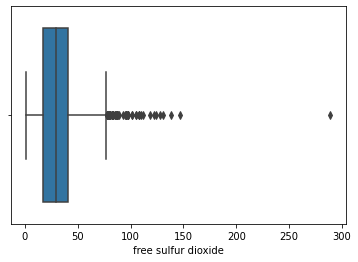

In [ ]:
sns.boxplot(x=wine['free sulfur dioxide'])

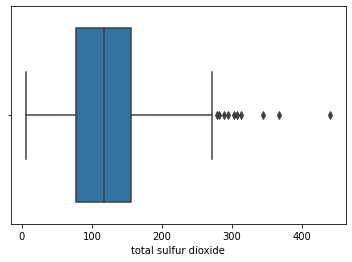

In [ ]:
sns.boxplot(x=wine['total sulfur dioxide'])

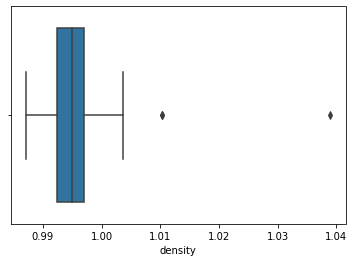

In [ ]:
sns.boxplot(x=wine['density'])

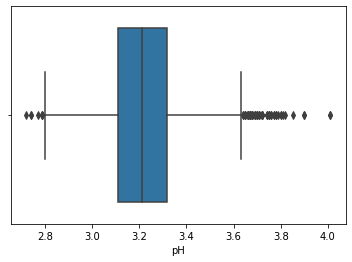

In [ ]:
sns.boxplot(x=wine['pH'])

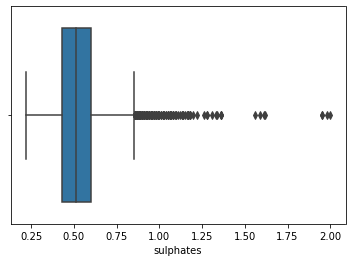

In [ ]:
sns.boxplot(x=wine['sulphates'])

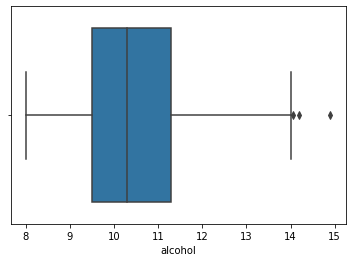

In [ ]:
sns.boxplot(x=wine['alcohol'])

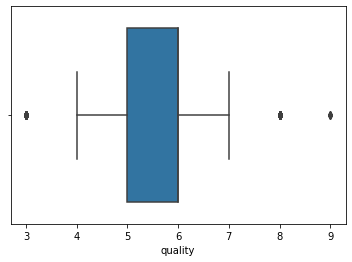

In [ ]:
sns.boxplot(x=wine['quality'])

Dari output diatas setiap data memiliki outlier nya masing-masing, data yang berada diluar pengamatan akan dihapus menggunakan metode IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier. 

*note:* 
``` 
Q1 = Minimum (Sebelah kiri)
Q3 = Maximum (Sebelah kanan)
```

Persamaan mengidentifikasi :
```
Minimum = Q1 - 1.5 * IQR

Maximum = Q3 + 1.5 * IQR
```

In [ ]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR=Q3-Q1
wine=wine[~((wine<(Q1-1.5*IQR))|(wine>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
wine.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(4815, 13)

Setelah penghapusan outlier jumlah data menjadi ***4815***

## Univariate Analysis

proses analisis data dengan teknik Univariate EDA.

Membagi dua fitur yaitu numerikal dan categorical

In [ ]:
numerical_features = wine.columns[1:].values
categorical_features = ['type']

print(numerical_features)
print(categorical_features)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']
['type']


### Categorical Feature

       jumlah sampel  persentase
white           4135        85.9
red              680        14.1


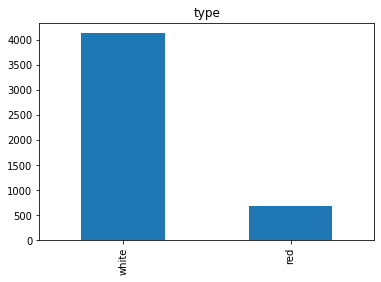

In [ ]:
feature = categorical_features[0]
count = wine[feature].value_counts()
percent = 100*wine[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari output diatas terdapat dua kategori pada fitur ***type***, jumlah paling banyak berada di kategori white dengan persentase 86%

### Numerical feature

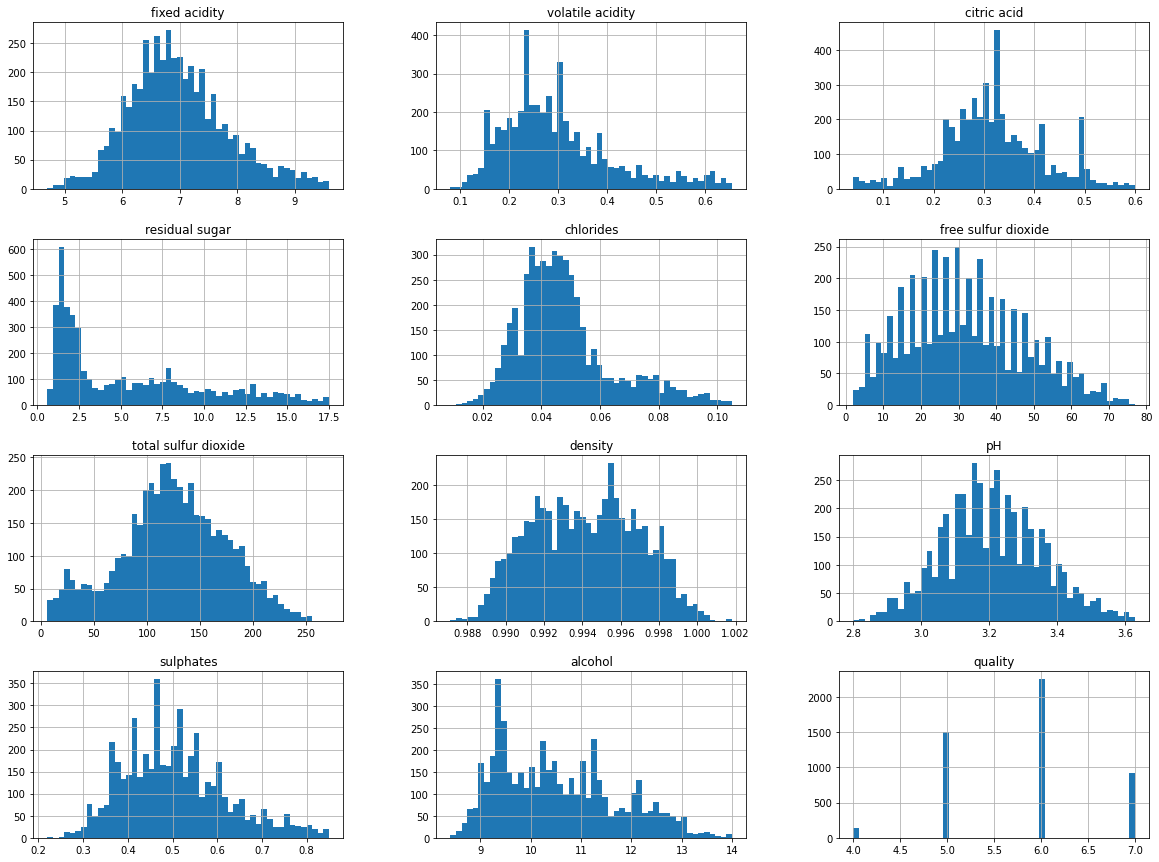

In [ ]:
wine.hist(bins=50, figsize=(20,15))
plt.show()

Dari pengamatan histogram diatas :

* Wine dengan quality 6 memiliki data yang cukup banyak sekitar 2500 jumlah data.

## Multivariate Analysis

Teknik multivariate analysis berfungsi untuk menunjukan hubungan anatara dua atau lebih variable pada data.

### Categorical Features

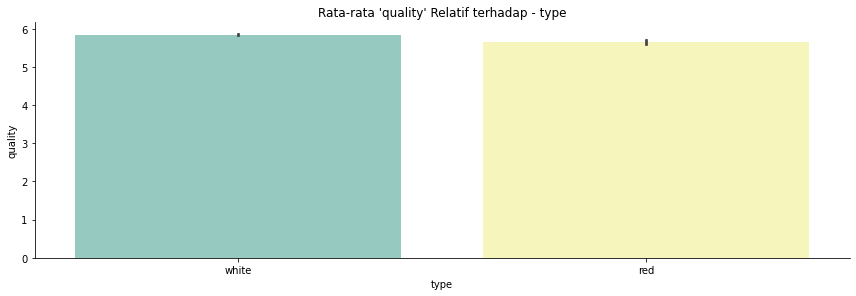

In [ ]:
cat_features = wine.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="quality", kind="bar", dodge=False, height = 4, aspect = 3,  data=wine, palette="Set3")
  plt.title("Rata-rata 'quality' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata quality relatif terhadap fitur kategori di atas, memperoleh insight :

* Pada fitur type rata-rata quality cenderung mirip, rentang berada di 5-6.

### Numerical Features

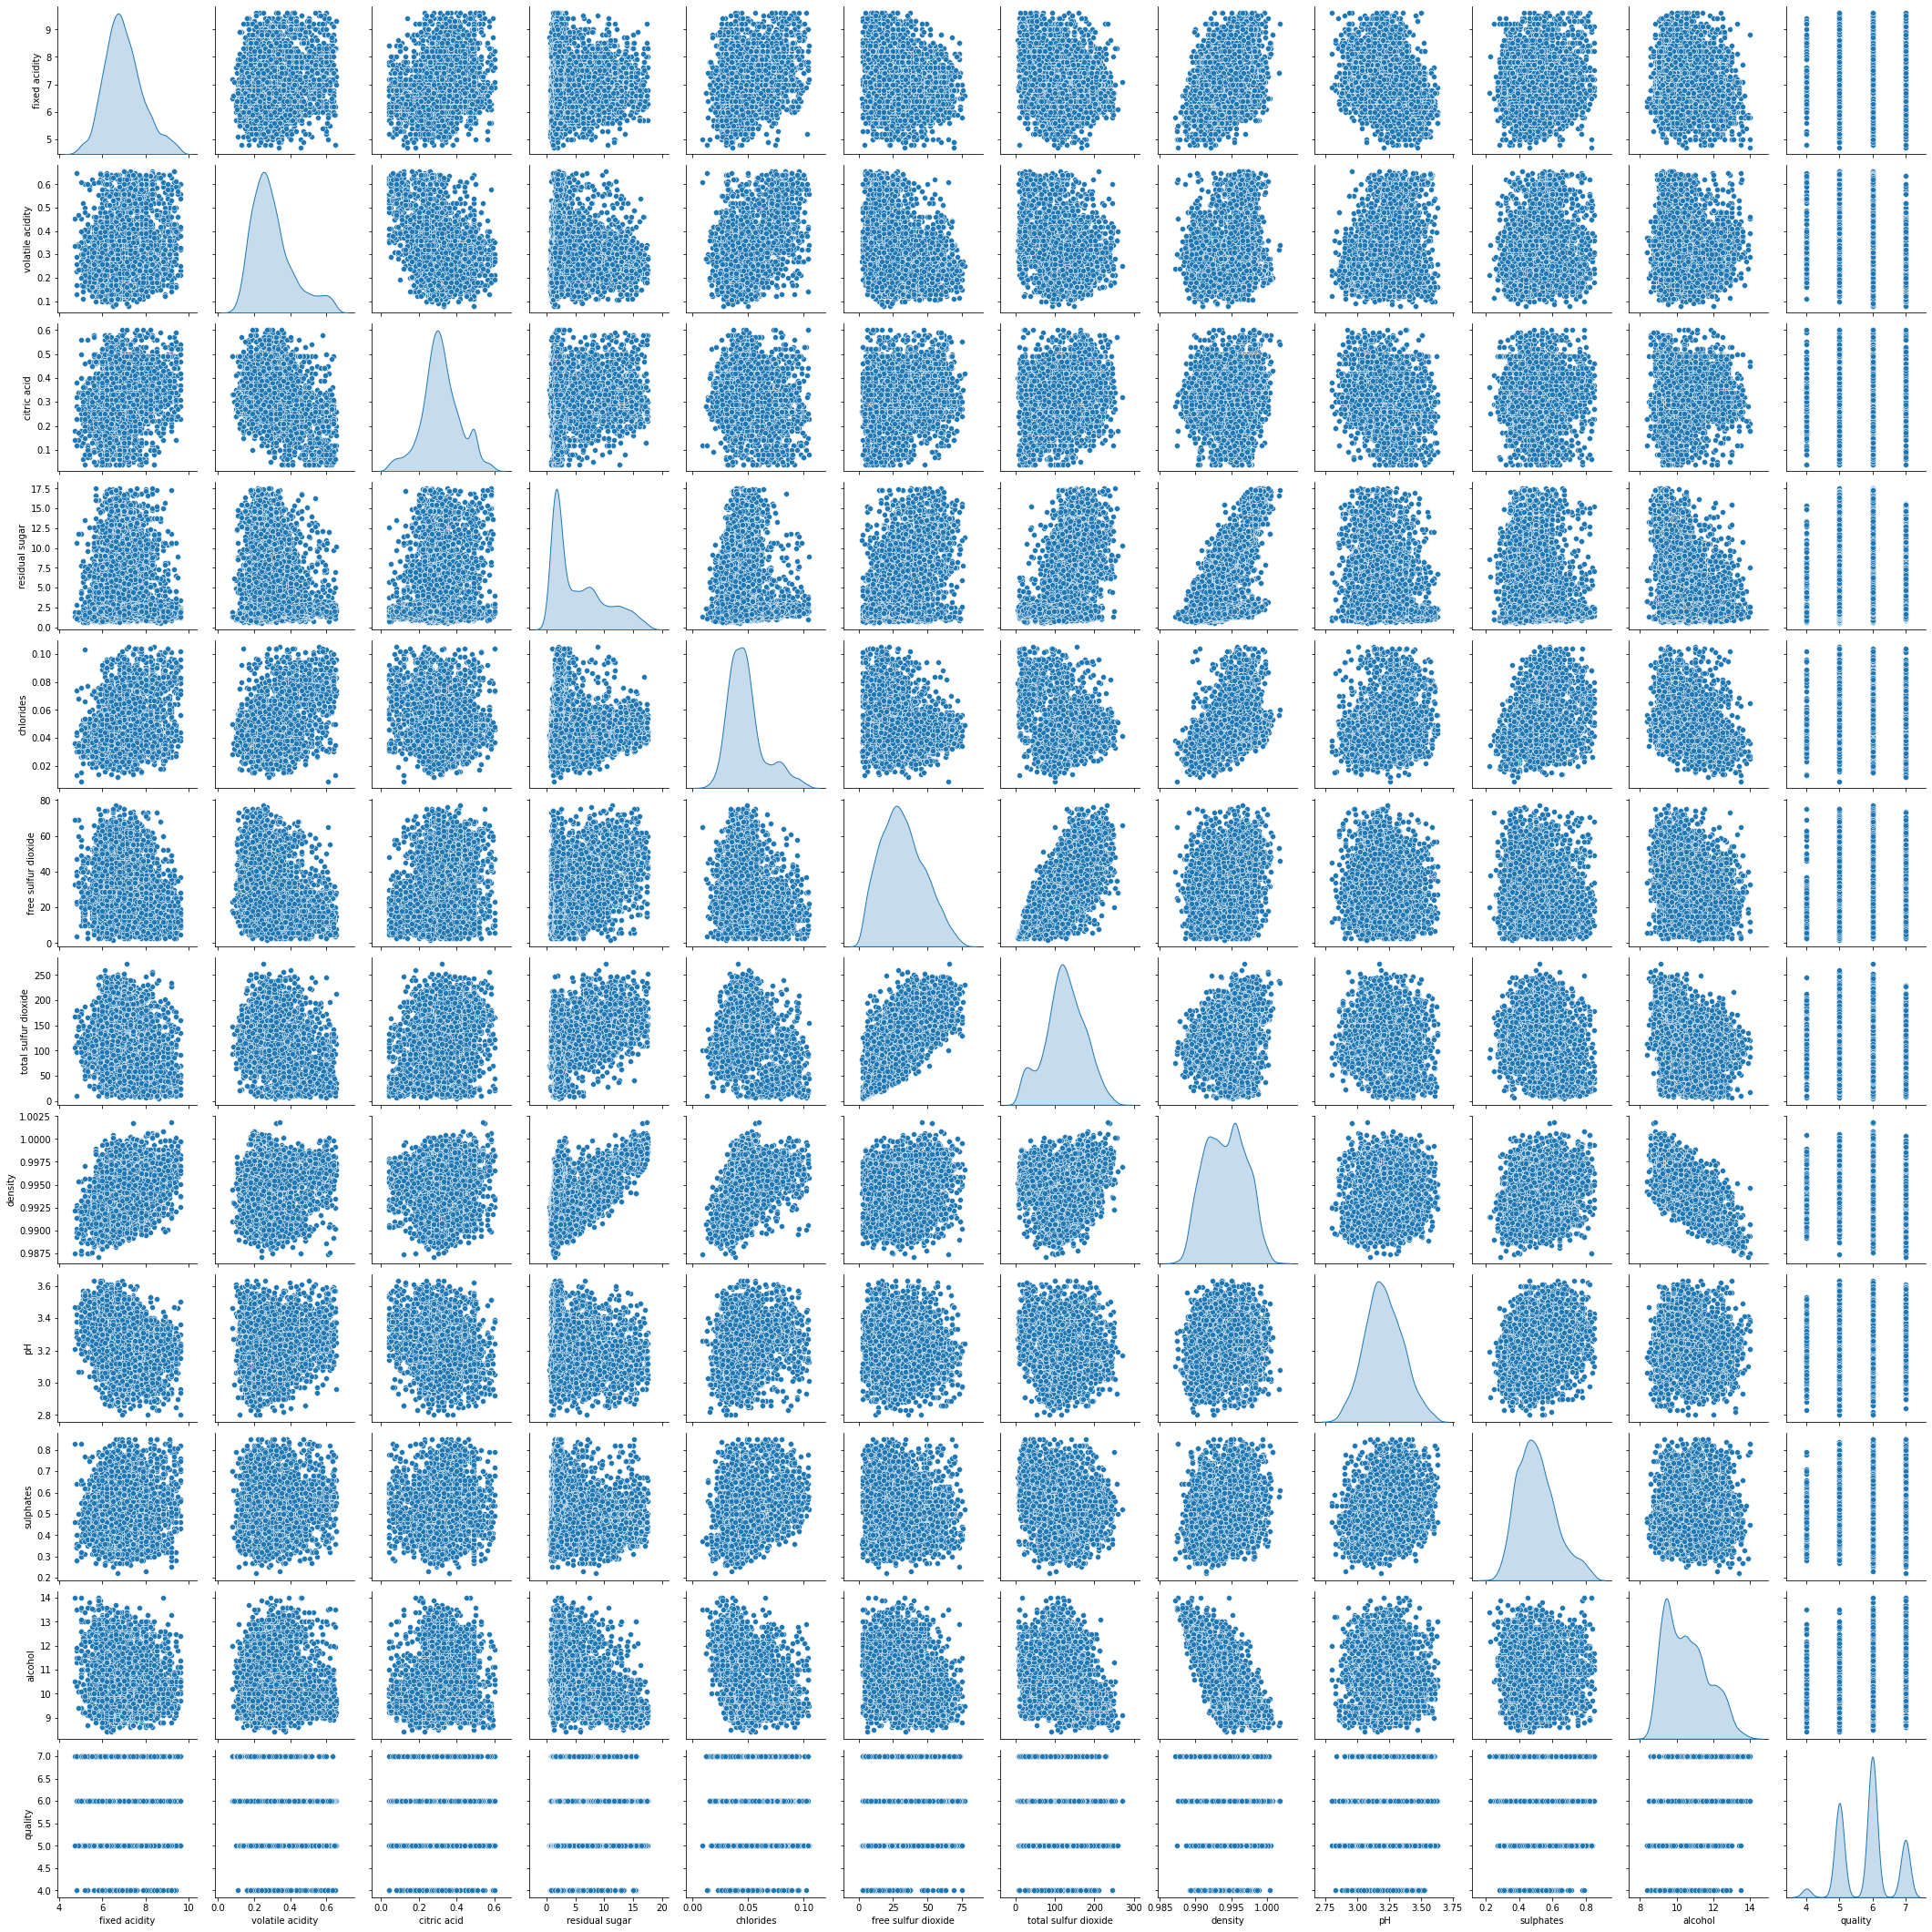

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(wine, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

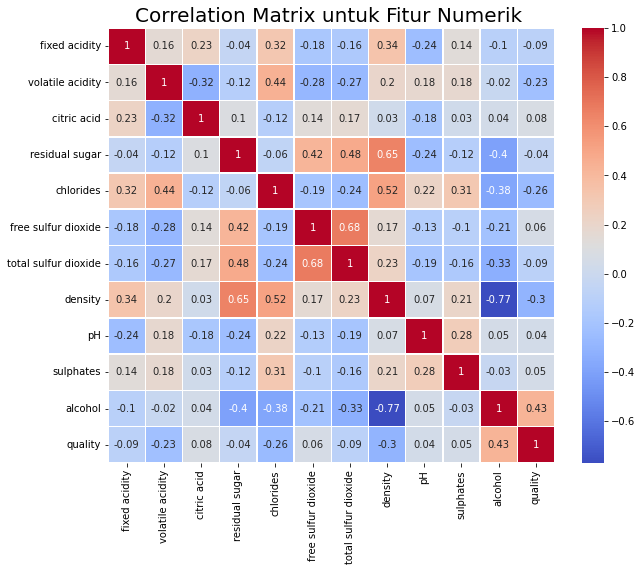

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = wine.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari pengamatan output diatas :
* Alcholol memiliki korelasi terhadap kualitas sebuah wine

* Selain itu, sulfur dioksida bebas dan sulfur dioksida total memiliki korelasi positif juga.

# Data Preparation

## Encoding

encoding fitur kategori menggunakan one-hot-encoding. Proses encoding dilakukan menggunakan get_dummies.

In [ ]:
wine = pd.concat([wine, pd.get_dummies(wine['type'], prefix='type')],axis=1)
wine.drop(['type'], axis=1, inplace=True)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  quality  type_red  type_white  
1      9.5        6         0           1  
2     10.1        6         0           1  
3      9.9        6         0           1  
4      9.9        6         0           1  
5     10.1        6         0           1

## Reduksi dimensi

mereduksi dimensi menggunakan PCA (Principal Component Analysis)

In [ ]:
numerical_features=numerical_features[:len(numerical_features)-1].tolist()

In [ ]:
wine[numerical_features]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
5               8.1             0.280         0.40             6.9      0.050   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08             1.9      0.068   
6492            6.2             0.600         0.08             2.0      0.090   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
5                    30.0                  97.0  0.99510  3.26       0.44   
...                   ...                   ...      ...   ...        ...   
6491                 28.0                  38.0  0.99651  3.42       0.82   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
5        10.1  
...       ...  
6491      9.5  
6492     10.5  
6494     11.0  
6495     10.2  
6496     11.0  

[4815 rows x 11 columns]

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=128)
pca.fit(wine[numerical_features])
princ_comp = pca.transform(wine[numerical_features])
pca.explained_variance_ratio_.round(3)

array([0.949, 0.045, 0.006])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(wine[numerical_features])
wine['dimension'] = pca.transform(wine.loc[:, tuple(numerical_features)]).flatten()
wine.drop(numerical_features, axis=1, inplace=True)

## Membagi dataset train dan test

Membagi dataset menjadi train dan test menggunakan train_test_split.

80% train

20% test

In [ ]:
from sklearn.model_selection import train_test_split
 
X = wine.drop(["quality"],axis =1)
y = wine["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 128)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4815
Total # of sample in train dataset: 3852
Total # of sample in test dataset: 963


## Standarisasi

Melakukan standarisasi agar data memiliki skala yang relatif sama.

Standarisasi disini menggunakan `StandardScaler`

In [ ]:
numerical_features = X_train.columns[2:].values
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

dimension
1853  -0.398489
31    -1.584009
1809   1.270873
5000  -1.786729
5794  -1.616947

In [ ]:
X_train[numerical_features].describe().round(4)

dimension
count  3852.0000
mean      0.0000
std       1.0001
min      -2.3836
25%      -0.6076
50%      -0.0119
75%       0.6769
max       2.9734

# Model Development

Pengembangan model menggunakan beberapa algoritma :
* KNN
* RandomForest
* Boosting
* Ridge Regression
* SVR
* Decision Tree

Dari beberapa model diatas saya menambahkan hyperparameter menggunakan *GridSearch*

## KNN

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting',"Ridge","SVR","Decision Tree"])

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn = KNeighborsRegressor()
gsc = GridSearchCV(knn, hyperparameters, cv=10)

knn_best_model = gsc.fit(X_train,y_train)
models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn_best_model.predict(X_train), y_true=y_train)

## Random Forest

In [ ]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100, 200, 300, 1000]
}

RF = RandomForestRegressor()

gsc_rf = GridSearchCV(estimator = RF, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)

rf_best_model = gsc_rf.fit(X_train,y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=rf_best_model.predict(X_train), y_true=y_train)          

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


## Adaboost

In [ ]:
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
}

boosting = AdaBoostRegressor()         
gsc_adaboost = GridSearchCV(estimator = boosting, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)                    
boosting_best_model = gsc_adaboost.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting_best_model.predict(X_train), y_true=y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


## Ridge Regression

In [ ]:
params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lg = Ridge()
gsc_lg = GridSearchCV(estimator = lg, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)                    
lg_best_model = gsc_lg.fit(X_train, y_train)
models.loc['train_mse','Ridge'] = mean_squared_error(y_pred=lg_best_model.predict(X_train), y_true=y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


## SVR

In [ ]:
params = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

svr = SVR()
gsc_svr = GridSearchCV(estimator = svr, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)   
svr_best_model = gsc_svr.fit(X_train, y_train)
models.loc['train_mse','SVR'] = mean_squared_error(y_pred=svr_best_model.predict(X_train), y_true=y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


## Decision Tree

In [ ]:
params = {"min_samples_split": [10, 20, 40],
          "max_depth": [2, 6, 8],
          "min_samples_leaf": [20, 40, 100],
          "max_leaf_nodes": [5, 20, 100],
          }

tree = DecisionTreeRegressor()
gsc_tree = GridSearchCV(estimator = tree, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)   
tree_best_model = gsc_tree.fit(X_train, y_train)
models.loc['train_mse','Decision Tree'] = mean_squared_error(y_pred=tree_best_model.predict(X_train), y_true=y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


# Evaluasi

Scaling pada data test

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Evaluasi model dengan metrik MSE (Mean Squared Error)

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RandomForest', 'Boosting',"Ridge","SVR","Decision Tree"])
 
model_dict = {'KNN': knn_best_model, 
              'RandomForest': rf_best_model, 
              'Boosting': boosting_best_model,
              "Ridge":lg_best_model,
              "SVR":svr_best_model,
              "Decision Tree":tree_best_model}
 
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
 
mse

train      test
KNN            0.523398  0.529907
RandomForest   0.373507  0.533666
Boosting       0.552796  0.518226
Ridge          0.575474  0.525177
SVR            0.594794  0.551566
Decision Tree  0.552751  0.520433

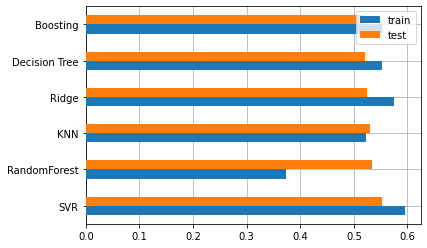

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Pengujian model

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_RandomForest  prediksi_Boosting  \
2145       6           5.8                    5.9                5.9   

      prediksi_Ridge  prediksi_SVR  prediksi_Decision Tree  
2145             5.7           5.8                     6.0

Terlihat Decision tree memberikan hasil yang sesuai.